## Image processing

## scikit-image

In [1]:
import skimage
import matplotlib.pyplot as plt

In [2]:
image = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/24138_196_F7_2.tif')

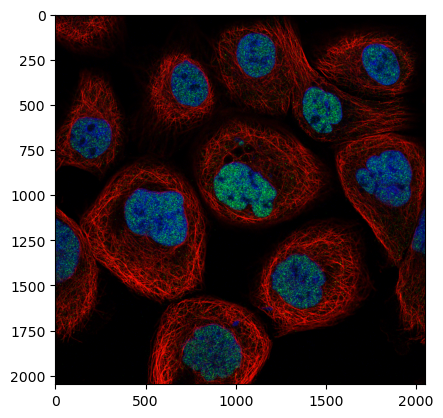

In [3]:
plt.imshow(image);

### Filtering

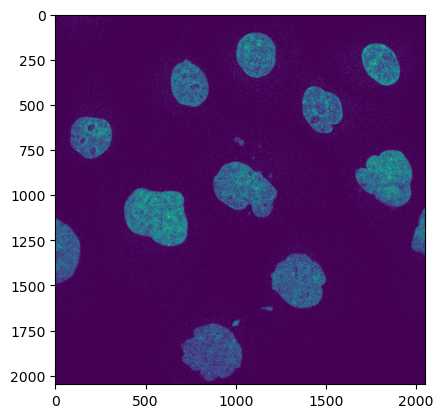

In [4]:
plt.imshow(image[:,:,2]);

In [5]:
im_gauss = skimage.filters.gaussian(image[:,:,2], sigma=10)

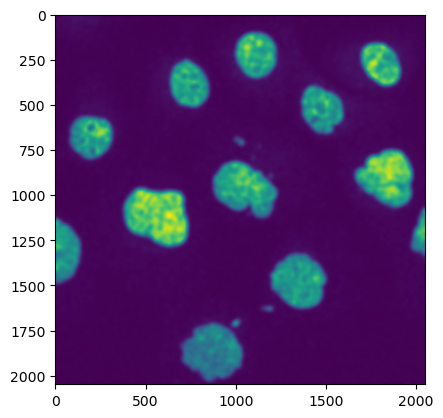

In [6]:
plt.imshow(im_gauss);

### Thresholding

In [7]:
threshold = skimage.filters.threshold_otsu(im_gauss)
threshold

0.15809777672277517

In [8]:
mask = im_gauss > threshold

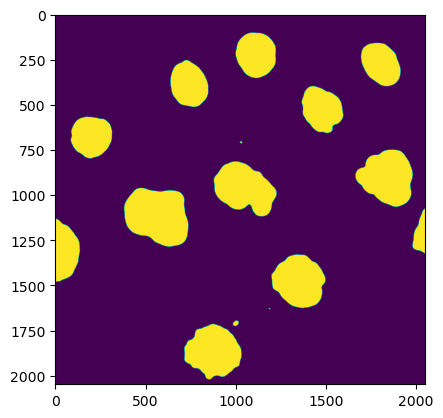

In [9]:
plt.imshow(mask);

### Labeling

In [10]:
im_label = skimage.measure.label(mask)

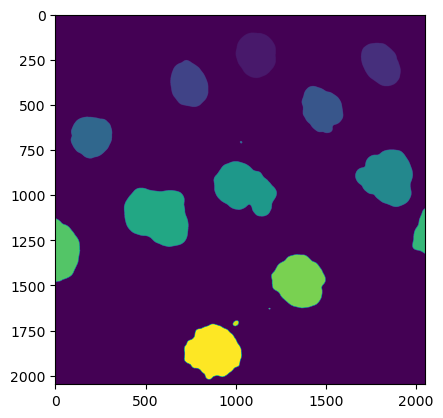

In [12]:
plt.imshow(im_label);

### Measuring

In [19]:
properties = skimage.measure.regionprops_table(im_label, properties=('label', 'area', 'eccentricity'))

In [20]:
properties

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 'area': array([4.4181e+04, 3.9293e+04, 4.1218e+04, 4.3361e+04, 4.1305e+04,
        1.1000e+02, 7.1273e+04, 7.0506e+04, 8.9837e+04, 1.0783e+04,
        3.6045e+04, 6.4951e+04, 4.5000e+01, 7.1900e+02, 6.8287e+04]),
 'eccentricity': array([0.47564587, 0.69757789, 0.62709892, 0.59062958, 0.17594743,
        0.55999584, 0.40836241, 0.74816214, 0.63315469, 0.95757936,
        0.90227994, 0.42633753, 0.74610816, 0.67293805, 0.41147752])}

In [21]:
import pandas as pd

In [22]:
properties_df = pd.DataFrame(properties)
properties_df

,label,area,eccentricity
0,1,44181.0,0.475646
1,2,39293.0,0.697578
2,3,41218.0,0.627099
3,4,43361.0,0.590630
4,5,41305.0,0.175947
5,6,110.0,0.559996
6,7,71273.0,0.408362
7,8,70506.0,0.748162
8,9,89837.0,0.633155
9,10,10783.0,0.957579


## Processing with advanced methods

In [24]:
from cellpose import models

In [25]:
model = models.Cellpose(model_type='cyto2')
output = model.eval(image[::2,::2], channels=[0,2], channel_axis=2, diameter=500)

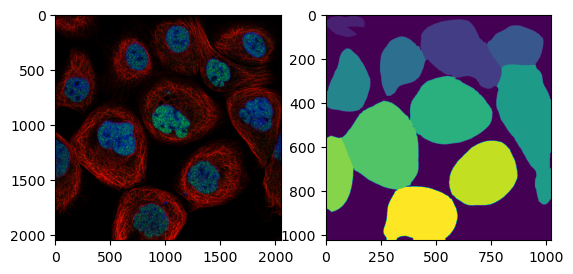

In [26]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[1].imshow(output[0])